Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

import libraries


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv('customerchurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [90]:
df.shape

(7043, 21)

The dataset consist of 7043 rows and 21 columns

In [91]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [92]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There are 21 columns present in the dataset

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consist of 1 float type of data and 2 integer type of data and 18 columns are object type of data

# EDA

In [94]:
#Checking the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values present in the dataset

<AxesSubplot:>

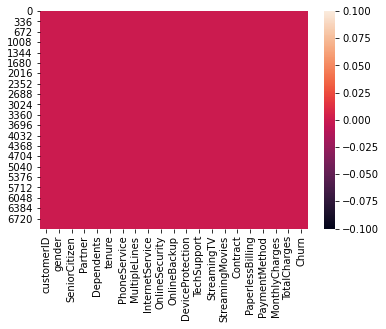

In [95]:
sns.heatmap(df.isnull())

we observe that 'Total Charges' is of object type we have to convert it into float 

In [96]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [97]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


we have some spaces in the TotalCharges column

we can fill these spaces replaces with nan values.we have to handle these nan values
Handling the nan values and replace with mean of the column. as the column is a continuous type

In [99]:
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)

In [100]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [101]:
#converting TotalCharges column datatype from object to float
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [123]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [124]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


# Making DataFrame for Nominal Data

In [60]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
df_visualization_nominal=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

In [62]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


# Visualization of the data

For the nominal categeorical data we will use countplot as it will give the frequency of the classes of the columns

Male      3555
Female    3488
Name: gender, dtype: int64

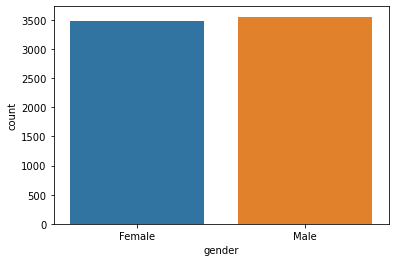

In [63]:
sns.countplot(x='gender',data=df_visualization_nominal)
df_visualization_nominal['gender'].value_counts()

From the above observation we found that males are 3555 and the females are 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

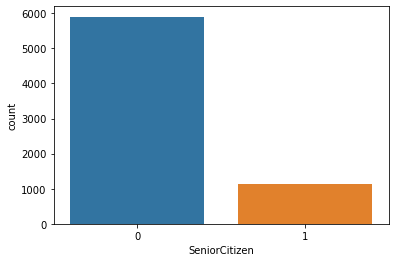

In [64]:
sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
df_visualization_nominal['SeniorCitizen'].value_counts()

From the above observation the total number of younger customer is 5901 and SeniorCitizen customers are 1142

No     3641
Yes    3402
Name: Partner, dtype: int64

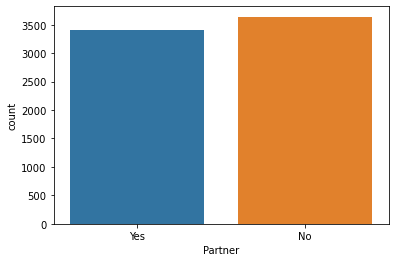

In [65]:

sns.countplot(x='Partner',data=df_visualization_nominal)
df_visualization_nominal['Partner'].value_counts()

From the above observation married people are 3402 and unmarried people are 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64

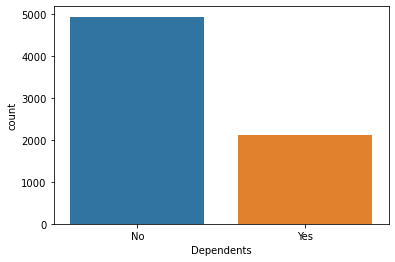

In [66]:
sns.countplot(x='Dependents',data=df_visualization_nominal)
df_visualization_nominal['Dependents'].value_counts()

From the above graph there are 4933 members not having dependents and 2110 members having dependents

Yes    6361
No      682
Name: PhoneService, dtype: int64

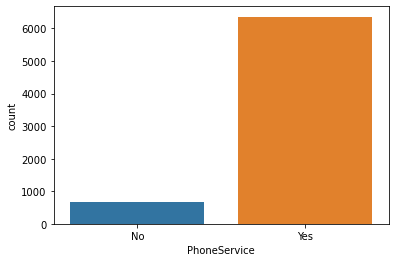

In [67]:
sns.countplot(x='PhoneService',data=df_visualization_nominal)
df_visualization_nominal['PhoneService'].value_counts()


From the above graph 6361 members having phone service and 682 members not having phone service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

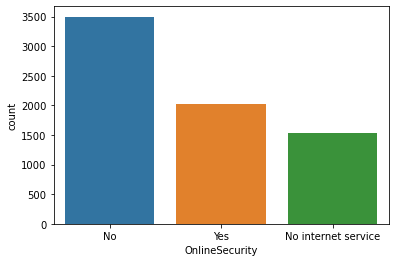

In [68]:
sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
df_visualization_nominal['OnlineSecurity'].value_counts()

From the above observations 3490 customers not having online security 2019 members having online security and 1526 members having No InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

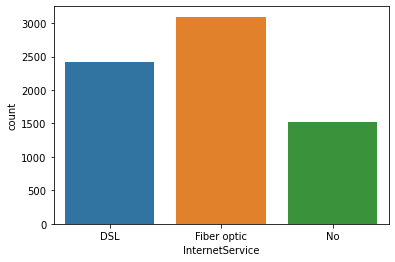

In [69]:
sns.countplot(x='InternetService',data=df_visualization_nominal)
df_visualization_nominal['InternetService'].value_counts()

From the above graph 3096 members having fiber optics Internet service 2421 members having DSL Service and 1526 members having no internet service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

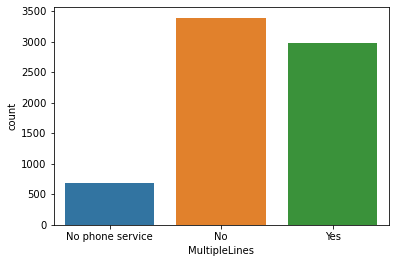

In [70]:
sns.countplot(x='MultipleLines',data=df_visualization_nominal)
df_visualization_nominal['MultipleLines'].value_counts()

From the above obervation 2971 members having multiple lined and 3390 members not having multiple lines and 682 members having no phone service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

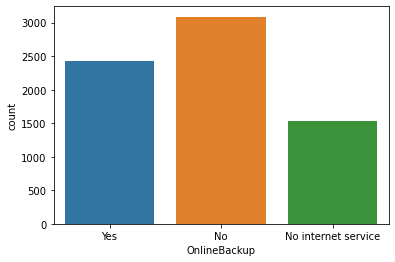

In [71]:
sns.countplot(x='OnlineBackup',data=df_visualization_nominal)
df_visualization_nominal['OnlineBackup'].value_counts()


From the above observations 3088 members not having no online backup and 2429 members having online backup and 1526 members not having Internetservice

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

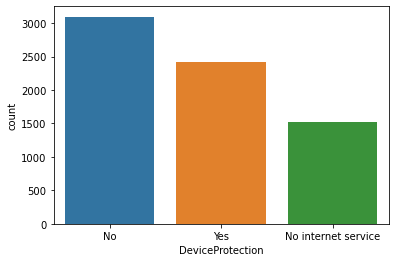

In [72]:
sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
df_visualization_nominal['DeviceProtection'].value_counts()

From the above observation 3095 members not having device protection,2422 members having device protection and 1526 members not having Internetservice

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

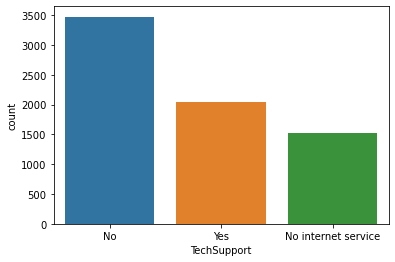

In [73]:
sns.countplot(x='TechSupport',data=df_visualization_nominal)
df_visualization_nominal['TechSupport'].value_counts()

From the above observations 3473 members not having TechSupport and 2044 members having TechSupport and 1526 members not having InternetService

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

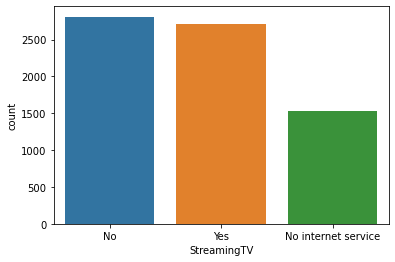

In [74]:
sns.countplot(x='StreamingTV',data=df_visualization_nominal)
df_visualization_nominal['StreamingTV'].value_counts()

From the above obsevations 2810 members are not Streaming to TV and 2707 members are Streaming to TV

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

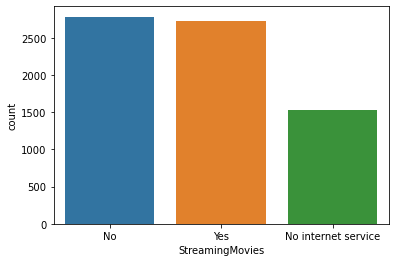

In [75]:
sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
df_visualization_nominal['StreamingMovies'].value_counts()

From the Above observations 2785 not Streamed to Movies and 2732 members Streamed to movies

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

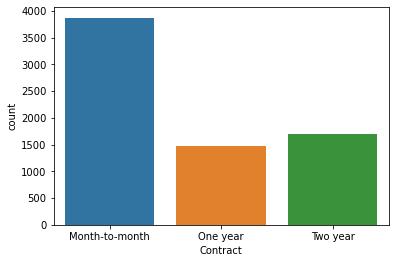

In [76]:
sns.countplot(x='Contract',data=df_visualization_nominal)
df_visualization_nominal['Contract'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

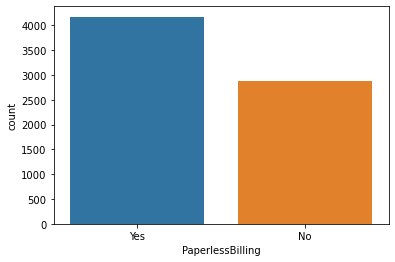

In [77]:
sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
df_visualization_nominal['PaperlessBilling'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

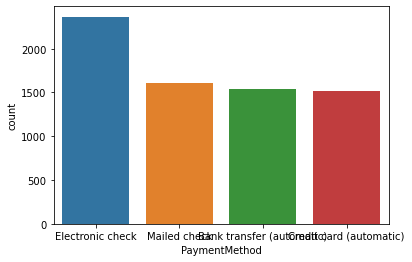

In [78]:

sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
df_visualization_nominal['PaymentMethod'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

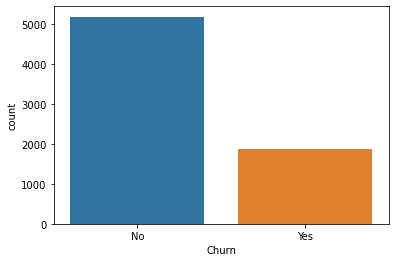

In [79]:
sns.countplot(x='Churn',data=df_visualization_nominal)
df_visualization_nominal['Churn'].value_counts()


# Making DataFrame of Ordinal Data

In [80]:
df_visualization_ordinal=df[['customerID','tenure']].copy()

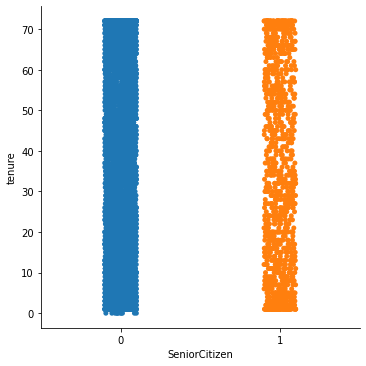

In [81]:

sns.catplot(x='SeniorCitizen',y='tenure',data=df)

# Checking the distribution of the continuous value of the float type columns

In [104]:
df_visualization_continuous=df[['MonthlyCharges','TotalCharges']].copy()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

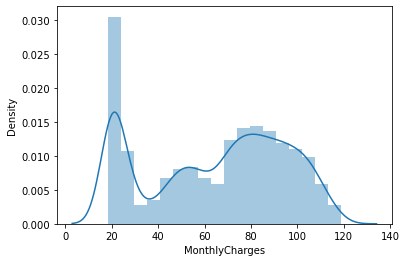

In [105]:
sns.distplot(df_visualization_continuous['MonthlyCharges'],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

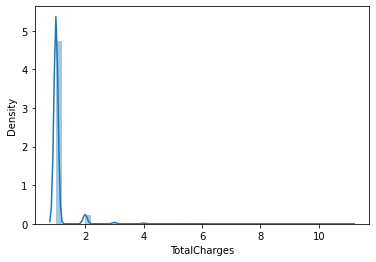

In [106]:
sns.distplot(df_visualization_continuous['TotalCharges'].value_counts(),kde=True)

we will convert categorical data into numerical

# Encoding

In [107]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [108]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


describe method shows the statistical information of the data, it displays min,max values of the columns,and quantiles of the data

# Correlation

<AxesSubplot:>

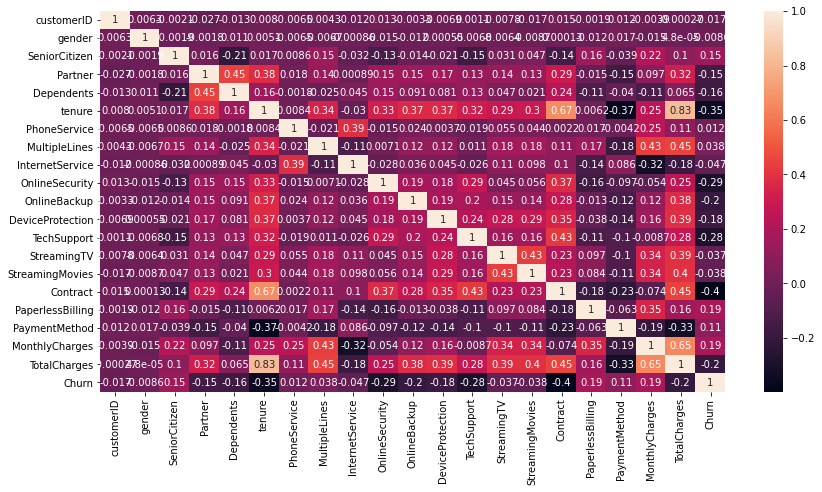

In [109]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

Contract is 67 % correlated to tenure,
Dependents are 45% correlated to Partner and 34% correlated  with Multiple lines
Total Charges is 28% correlated with Monthly charges , and very less correlated with all other columns

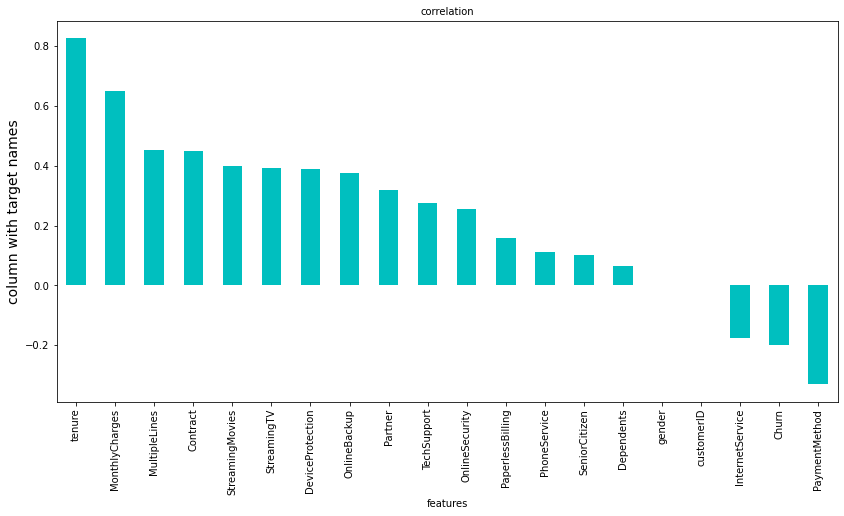

In [110]:
plt.figure(figsize=(14,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('features',fontsize=10)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=10)
plt.show()

Dependents,InternetService and Paymethod are negatively correlated

In [111]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.961642
Churn               1.063031
dtype: float64

keeping +/-0.5 in range of skewness some columns not lie with in the range
SeniorCitizens-categeoricalData
PhoneServices-categeoricalData
Dependents-categeoricalData
Contract-categeoricalData
TotalCharges-target variable
Churn-categeoricalData


## Outliers Check

In [112]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

Checking the outliers in the int and float type of columns

<AxesSubplot:>

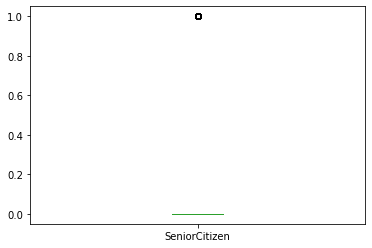

In [113]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

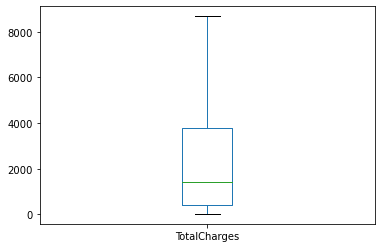

In [114]:
df['TotalCharges'].plot.box()

In [115]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

since the SeniorCitizen as nominal type we can not consider its datapoint as outlier

# Outlier Removal

In [125]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [126]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [127]:
#percentage loss of data
data_loss=((7043-6361)/7043)*100
data_loss

9.683373562402386

our data is becoming biased as it is not considering the case SeniorCitizen .Thus we will not remove outliers

## Seperating columns into features and Target

In [128]:
x=df.drop(['TotalCharges'],axis=1)
y=df['TotalCharges']

## Scaling the data using MinMaxScaler

In [129]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.76327748, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.        ],
       [0.56262425, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.        ],
       [0.36410111, 1.        , 0.        , ..., 1.        , 0.35422886,
        1.        ],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.        ],
       [0.84265834, 1.        , 1.        , ..., 1.        , 0.55870647,
        1.        ],
       [0.31610338, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.        ]])

# Model Building

Here our target variable is continuous type so, we use LinearRegression

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i} the training accaracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state {i} the testing accaracy is:{r2_score(y_test,pred_test)}")
    print("/n")

At random state 1 the training accaracy is:0.9052277082152647
At random state 1 the testing accaracy is:0.9003132716690803
/n
At random state 2 the training accaracy is:0.9056858398935238
At random state 2 the testing accaracy is:0.8984735750686562
/n
At random state 3 the training accaracy is:0.9044956724241888
At random state 3 the testing accaracy is:0.9032713403489698
/n
At random state 4 the training accaracy is:0.9031354749784841
At random state 4 the testing accaracy is:0.9085937883962483
/n
At random state 5 the training accaracy is:0.9026338340566922
At random state 5 the testing accaracy is:0.9101290251842342
/n
At random state 6 the training accaracy is:0.9028087364691222
At random state 6 the testing accaracy is:0.9097783155230825
/n
At random state 7 the training accaracy is:0.9030731852162728
At random state 7 the testing accaracy is:0.9090152662295623
/n
At random state 8 the training accaracy is:0.9031695399147395
At random state 8 the testing accaracy is:0.908984025288

/n
At random state 71 the training accaracy is:0.9048853138919165
At random state 71 the testing accaracy is:0.9019274244055183
/n
At random state 72 the training accaracy is:0.9037795522356793
At random state 72 the testing accaracy is:0.9060130441686695
/n
At random state 73 the training accaracy is:0.9043793318277787
At random state 73 the testing accaracy is:0.9038411202507989
/n
At random state 74 the training accaracy is:0.9033485778029403
At random state 74 the testing accaracy is:0.9074051047090449
/n
At random state 75 the training accaracy is:0.9057119465169854
At random state 75 the testing accaracy is:0.8976818783186062
/n
At random state 76 the training accaracy is:0.9051003915397745
At random state 76 the testing accaracy is:0.9010244334140154
/n
At random state 77 the training accaracy is:0.9034097271922368
At random state 77 the testing accaracy is:0.9074913676761283
/n
At random state 78 the training accaracy is:0.905987042620559
At random state 78 the testing accaracy

At random state 141 the training accaracy is:0.9058069274941295
At random state 141 the testing accaracy is:0.8978688658543884
/n
At random state 142 the training accaracy is:0.9025904029144671
At random state 142 the testing accaracy is:0.9100172600535585
/n
At random state 143 the training accaracy is:0.9041713119811091
At random state 143 the testing accaracy is:0.9045780979075899
/n
At random state 144 the training accaracy is:0.904748381415523
At random state 144 the testing accaracy is:0.9024198150629634
/n
At random state 145 the training accaracy is:0.9045026345341955
At random state 145 the testing accaracy is:0.9031322325462795
/n
At random state 146 the training accaracy is:0.9049069970400445
At random state 146 the testing accaracy is:0.9017095269857911
/n
At random state 147 the training accaracy is:0.9050400456329604
At random state 147 the testing accaracy is:0.9013012284185692
/n
At random state 148 the training accaracy is:0.9046952815590295
At random state 148 the tes

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [133]:
lr.fit(x_train,y_train)

LinearRegression()

In [134]:
pred_test=lr.predict(x_test)

In [135]:
print(r2_score(y_test,pred_test))

0.9003132716690803


# CrossValidation of the Model

In [136]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cross val is {cv_score} the accuracy score for training is {train_accuracy} accuracy for testing is {test_accuracy}")
    print("\n")      
          

At cross fold 2 the cross val is [0.90313002 0.90354649] the accuracy score for training is -0.9449508166862441 accuracy for testing is 0.9003132716690803


At cross fold 3 the cross val is [0.90373608 0.90219475 0.90517284] the accuracy score for training is -0.9449508166862441 accuracy for testing is 0.9003132716690803


At cross fold 4 the cross val is [0.89887623 0.90793519 0.90029485 0.90771157] the accuracy score for training is -0.9449508166862441 accuracy for testing is 0.9003132716690803


At cross fold 5 the cross val is [0.89735643 0.9093915  0.90303569 0.90274243 0.90580686] the accuracy score for training is -0.9449508166862441 accuracy for testing is 0.9003132716690803


At cross fold 6 the cross val is [0.89742712 0.91032557 0.90266081 0.90185907 0.90359513 0.90654172] the accuracy score for training is -0.9449508166862441 accuracy for testing is 0.9003132716690803


At cross fold 7 the cross val is [0.89836147 0.90175529 0.91069389 0.90075362 0.900923   0.9029586
 0.909

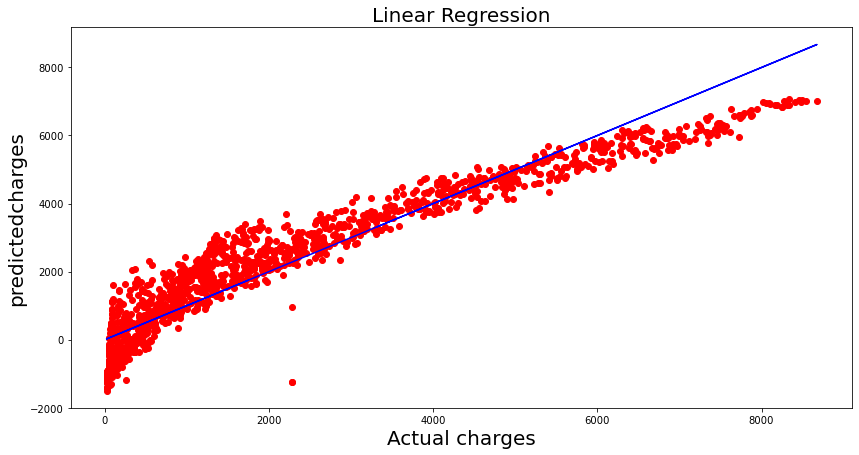

In [137]:
plt.figure(figsize=(14,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual charges",fontsize=20)
plt.ylabel("predictedcharges",fontsize=20)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [138]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [140]:
def regressor(model,x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    
    model.fit(x_train,y_train)
    
    pred=model.predict(x_test)
    
    print("MeanSquaredError",mean_squared_error(y_test,pred))
    print("MeanabsoluteError",mean_absolute_error(y_test,pred))
    print("RootMeanSquaredError",np.sqrt(mean_squared_error(y_test,pred)))
    print("r2_score is:",r2_score(y_test,pred))
    print("cross_validation_score is:",cross_val_score(model,x,y,cv=5).mean())

# Lasso

In [141]:
model=Lasso(alpha=0.001)
regressor(model,x,y)

MeanSquaredError 499016.1648271865
MeanabsoluteError 569.0319867532833
RootMeanSquaredError 706.4107621116672
r2_score is: 0.9014759498311091
cross_validation_score is: 0.9036665925222124


# Ridge

In [142]:
model=Ridge(alpha=0.01)
regressor(model,x,y)

MeanSquaredError 499015.94314985693
MeanabsoluteError 569.0310851609926
RootMeanSquaredError 706.4106052076631
r2_score is: 0.9014759935983252
cross_validation_score is: 0.9036665816624504


# ElasticNet

In [143]:
model=ElasticNet(alpha=0.01)
regressor(model,x,y)

MeanSquaredError 511059.14141479123
MeanabsoluteError 571.7913464801279
RootMeanSquaredError 714.8840055664914
r2_score is: 0.899098225594639
cross_validation_score is: 0.9010658329790264


# DecisionTreeRegressor

In [144]:
model=DecisionTreeRegressor(random_state=126)
regressor(model,x,y)

MeanSquaredError 15294.05636444287
MeanabsoluteError 81.4849183818311
RootMeanSquaredError 123.66914071199359
r2_score is: 0.9969803936570711
cross_validation_score is: 0.9971826785363568


# RandomForestRegressor

In [145]:
model=RandomForestRegressor()
regressor(model,x,y)

MeanSquaredError 7116.878809873845
MeanabsoluteError 54.333918026969485
RootMeanSquaredError 84.36159558634394
r2_score is: 0.9985948677130474
cross_validation_score is: 0.9987245826923339


# KNN

In [146]:
model=KNeighborsRegressor()
regressor(model,x,y)

MeanSquaredError 847438.902131474
MeanabsoluteError 615.3330811999247
RootMeanSquaredError 920.5644475708771
r2_score is: 0.832684552538322
cross_validation_score is: 0.8231934935976077


# HyperParameterTuning

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators':[1,2,3],     
        'criterion':['squared_error','mse'],
        'max_features':['auto','sqrt','log2'],
        'max_samples':[50,100,250,500,1000],
        'min_samples_split':[2,4,10]
       }
rf=RandomForestRegressor()
clf=GridSearchCV(rf,params)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'max_samples': 1000, 'min_samples_split': 2, 'n_estimators': 3}


In [148]:
rf=RandomForestRegressor(criterion='squared_error',max_features='auto',max_samples=50,min_samples_split=2,n_estimators=1)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2_score',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2_score 84.83791092739774
cross val score: 90.21302649680135


In [149]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred_decision})
df

,Actual,Predicted
3381,3320.75,3886.45
6180,6471.85,6937.95
4829,524.35,436.60
3737,249.95,389.60
4249,660.05,999.90
...,...,...
2563,2655.25,1864.65
2028,331.60,388.60
2899,3888.65,2390.45
3474,5688.45,6856.45


Conclusion: Here RandomForestRegressor is giving the r2_score of 84% and cross_val_score as 90%. so,we accept this model

# Saving the model

In [150]:
import pickle
filename="CustomerChurn.pkl"
pickle.dump(rfc,open(filename,'wb'))